In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\Users\\shalini lingampally\\Desktop\\R program\\ML kaggle")
print (os.getcwd())

C:\Users\shalini lingampally\Desktop\R program\ML kaggle


In [2]:
# Read train data set and get data
claim_train = pd.read_csv('train.csv')
print(claim_train.head())
print(claim_train.shape)

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]
(188318, 132)


In [3]:
# Target data set is continuous so we need to go with regression models
claim_train_target = claim_train[['loss']]
print(claim_train_target.head())
print(claim_train_target.shape)

      loss
0  2213.18
1  1283.60
2  3005.09
3   939.85
4  2763.85
(188318, 1)


In [4]:
# To know any missing values are present
claim_train.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cat19     0
cat20     0
cat21     0
cat22     0
cat23     0
cat24     0
cat25     0
cat26     0
cat27     0
cat28     0
cat29     0
         ..
cat102    0
cat103    0
cat104    0
cat105    0
cat106    0
cat107    0
cat108    0
cat109    0
cat110    0
cat111    0
cat112    0
cat113    0
cat114    0
cat115    0
cat116    0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [5]:
# Which gives information of continuous variables
claim_train.describe()

id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

In [6]:
# Read and get information of test data
claim_test = pd.read_csv('test.csv')
print(claim_test.head())
print(claim_test.shape)

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5     cont6  \
0   4    A    B    A    A    A    A    A    A    B  ...  0.281143  0.466591   
1   6    A    B    A    B    A    A    A    A    B  ...  0.836443  0.482425   
2   9    A    B    A    B    B    A    B    A    B  ...  0.718531  0.212308   
3  12    A    A    A    A    B    A    A    A    A  ...  0.397069  0.369930   
4  15    B    A    A    A    A    B    A    A    A  ...  0.302678  0.398862   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13    cont14  
0  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858  0.704052  0.392562  
1  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759  0.453468  0.208045  
2  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676  0.258586  0.297232  
3  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872  0.592264  0.555955  
4  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251  0.301535  0.825823  

[5 rows x 131 columns]
(125546, 131)


In [7]:
# To know missing values are present
claim_test.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cat19     0
cat20     0
cat21     0
cat22     0
cat23     0
cat24     0
cat25     0
cat26     0
cat27     0
cat28     0
cat29     0
         ..
cat101    0
cat102    0
cat103    0
cat104    0
cat105    0
cat106    0
cat107    0
cat108    0
cat109    0
cat110    0
cat111    0
cat112    0
cat113    0
cat114    0
cat115    0
cat116    0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
Length: 131, dtype: int64

In [8]:
# To get information of continuous variables
claim_test.describe()

id          cont1          cont2          cont3  \
count  125546.000000  125546.000000  125546.000000  125546.000000   
mean   294067.153442       0.494447       0.506939       0.498255   
std    170098.335649       0.187961       0.206837       0.201746   
min         4.000000       0.000016       0.001149       0.002634   
25%    146414.250000       0.347403       0.358319       0.336963   
50%    294306.000000       0.475784       0.555782       0.527991   
75%    441800.000000       0.626630       0.681761       0.634224   
max    587634.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  125546.000000  125546.000000  125546.000000  125546.000000   
mean        0.492334       0.487640       0.492188       0.485945   
std         0.210815       0.209119       0.205574       0.178650   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.352087   
50%         0.452887       0.422268       0.441525       0.438893   
75%         0.652072       0.643315       0.659261       0.591284   
max         0.956046       0.983107       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  125546.000000  125546.000000  125546.000000  125546.000000   
mean        0.487401       0.486015       0.498909       0.494360   
std         0.199549       0.182134       0.185950       0.210399   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.317960       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.466720       0.457203   
75%         0.629180       0.568890       0.619840       0.678924   
max         0.982800       0.995400       0.994980       0.997830   

              cont12         cont13         cont14  
count  125546.000000  125546.000000  125546.000000  
mean        0.494033       0.495086       0.495586  
std         0.210148       0.213108       0.222613  
min         0.036232       0.000228       0.178568  
25%         0.318249       0.315758       0.294752  
50%         0.462286       0.363547       0.406104  
75%         0.682413       0.689974       0.724791  
max         0.997416       0.988494       0.844814

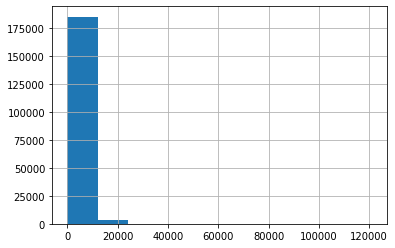

In [9]:
# Visulaize target variable
claim_train['loss'].hist()

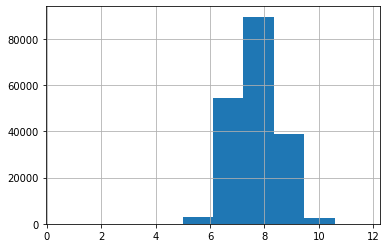

In [10]:
# Convert to log to know exact range
np.log1p(claim_train['loss']).hist()

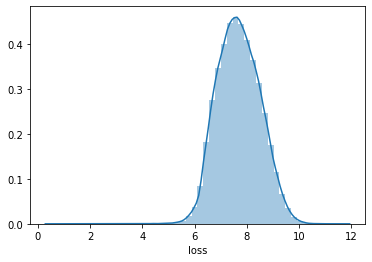

In [11]:
# By seaborn we can get distribution of data
sns.distplot(np.log1p(claim_train['loss']))

In [12]:
# Train data columns
claim_train.columns.values

array(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
       'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28',
       'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35',
       'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42',
       'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56',
       'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
       'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
       'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91',
       'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98',
       'cat99', 'cat100

In [13]:
# A variable to  store continuous variables 
claim_train_cont_target = claim_train[['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7','cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'loss']]

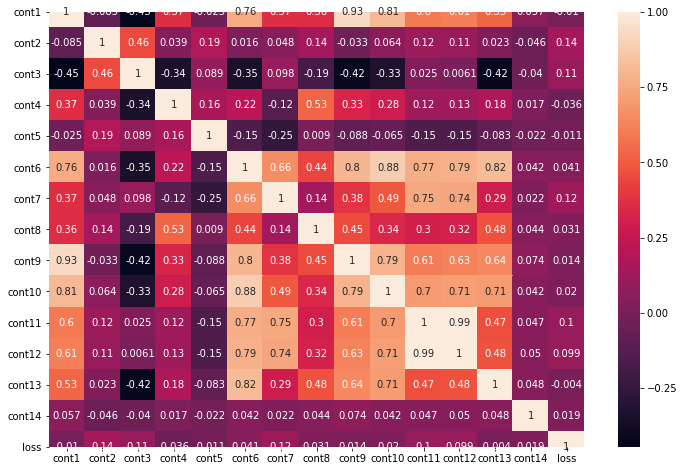

In [14]:
# To see correlation among continuous variables
correlation_matrix = claim_train_cont_target.corr()

plt.subplots(figsize=(12,8))

sns.heatmap(correlation_matrix, annot = True)

plt.show()

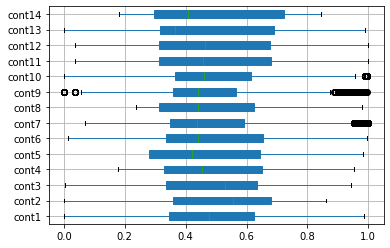

In [15]:
# To get outliers 
claim_train_cont = claim_train[['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7','cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']]
claim_train_cont.boxplot(vert=0,patch_artist=True)

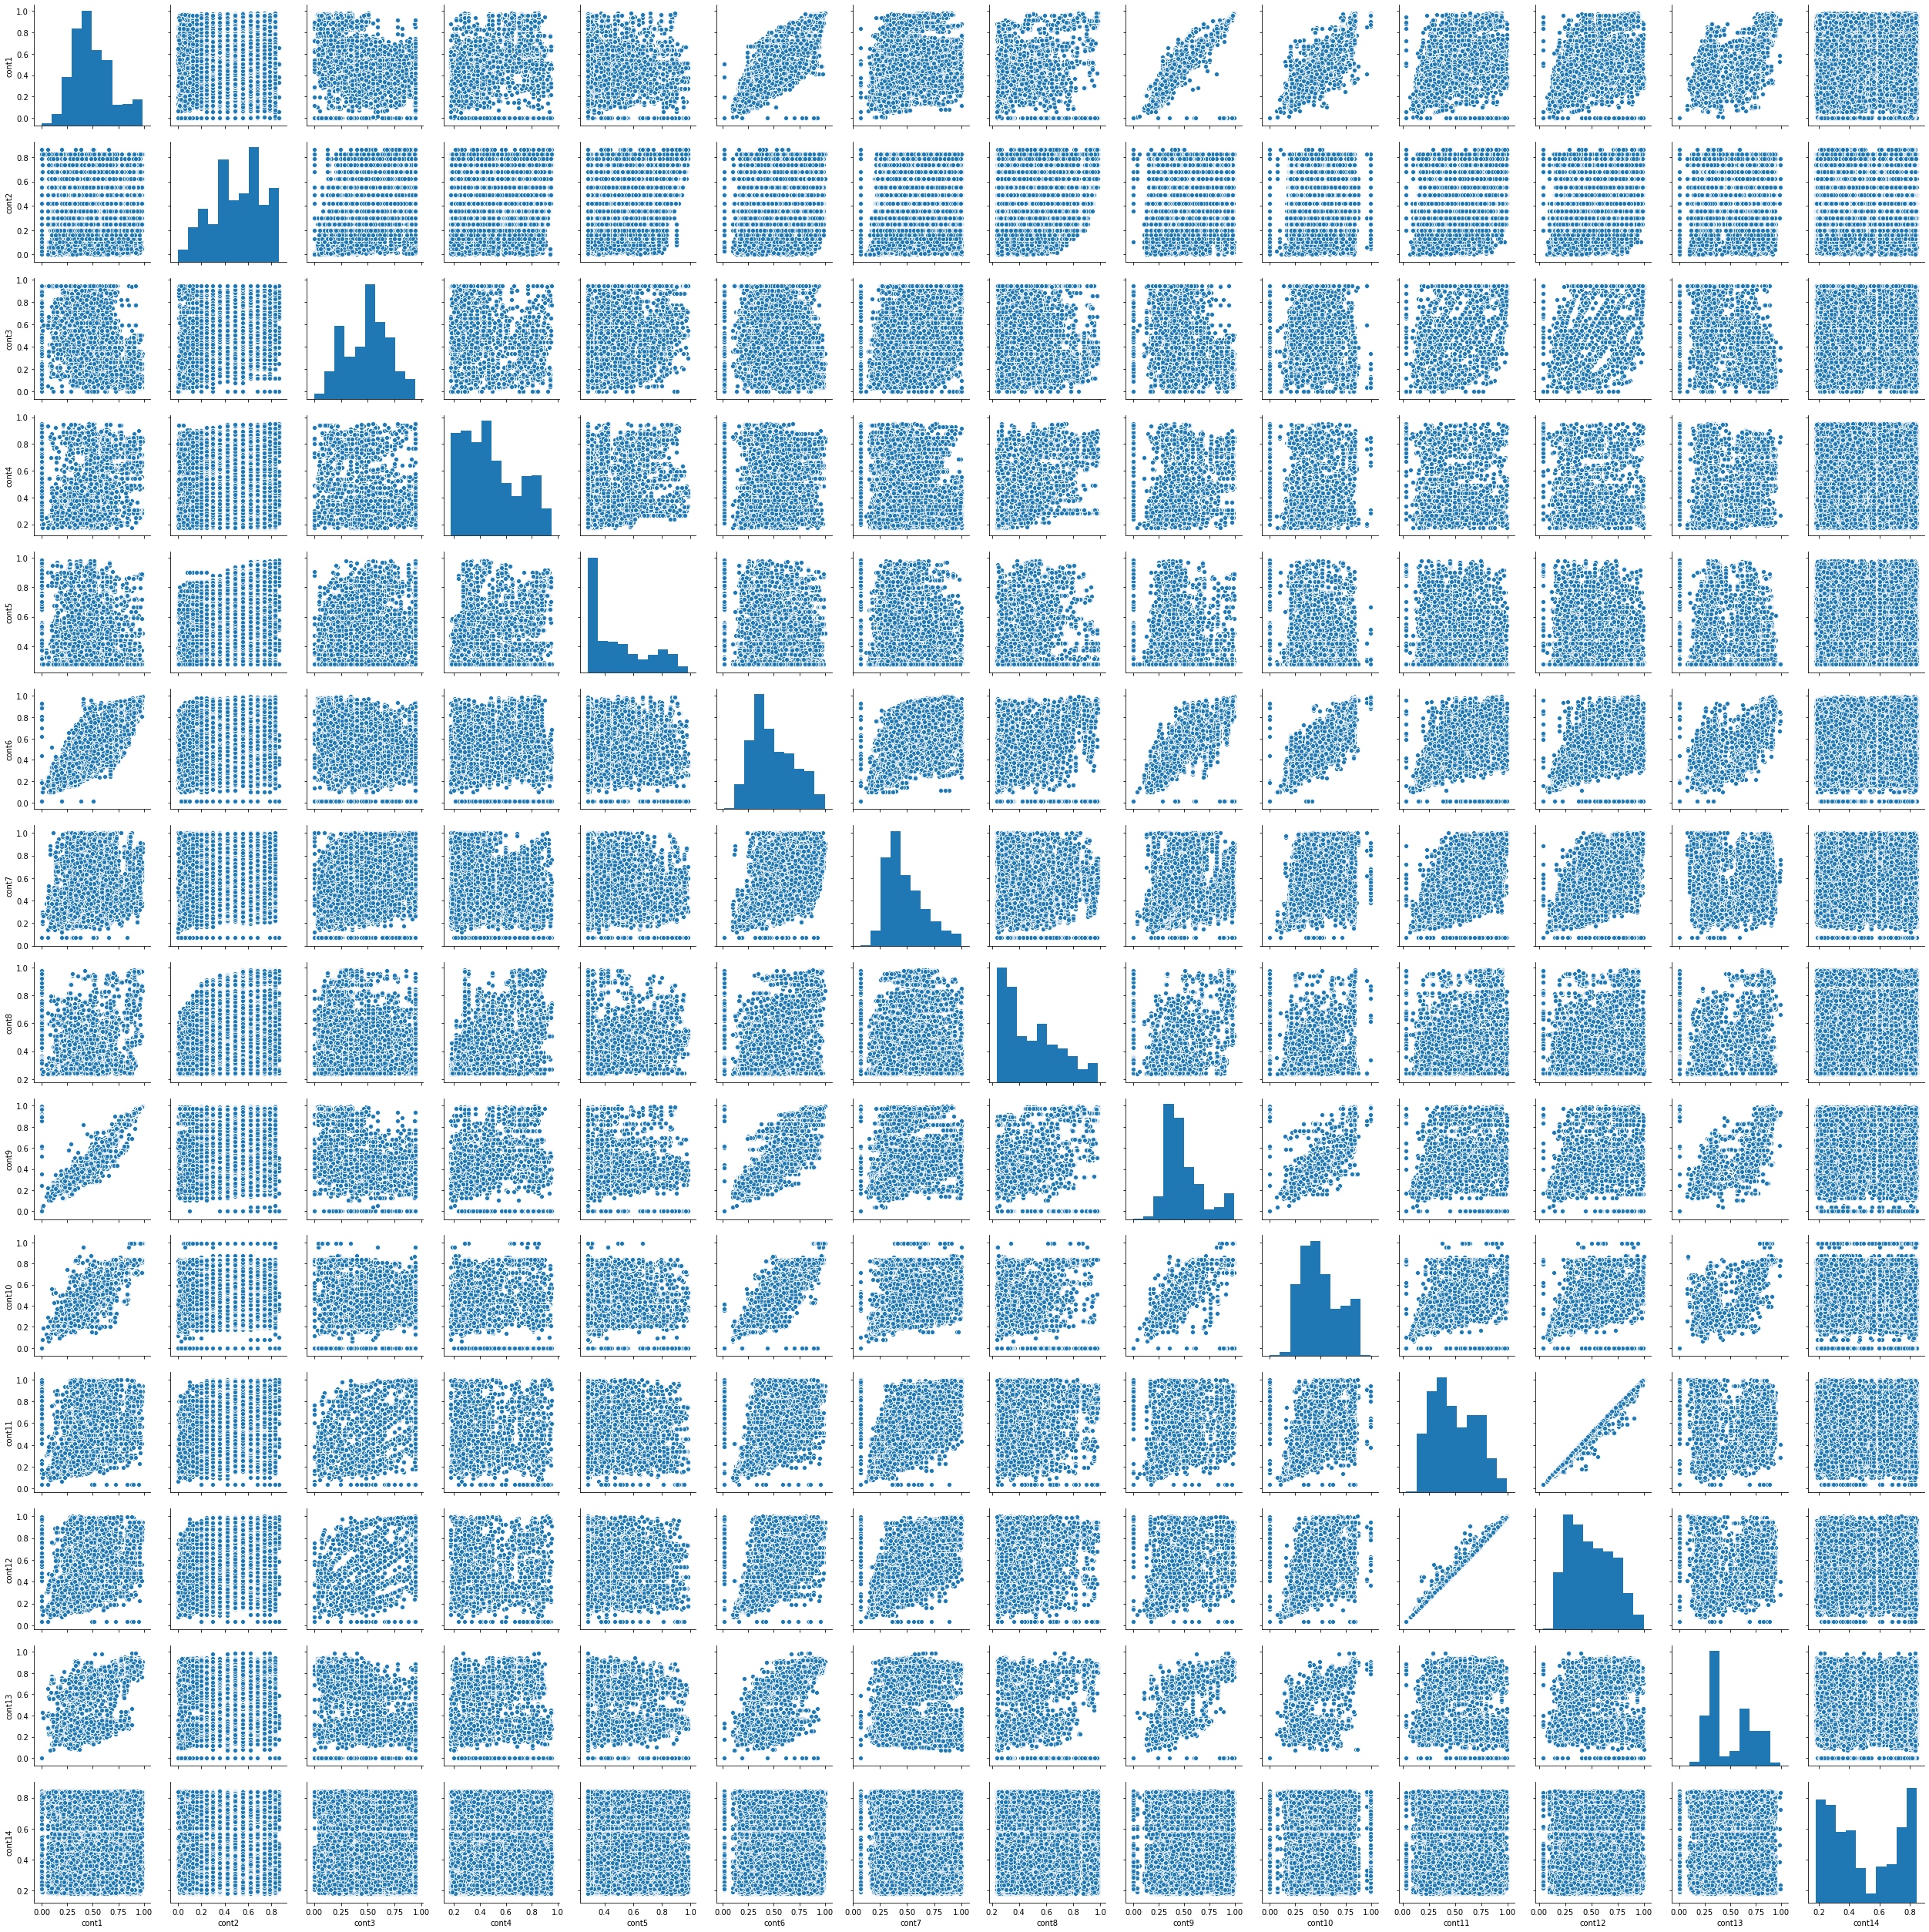

In [26]:
# Scatter plot to know relation among continuos variables
sns.pairplot(claim_train_cont)

In [16]:
# A variable to store categorical variables
claim_train_cat = claim_train[['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
       'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28',
       'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35',
       'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42',
       'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56',
       'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
       'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
       'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91',
       'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98',
       'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104',
       'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110',
       'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116']]

print(claim_train_cat.head())
print(claim_train_cat.apply(pd.Series.nunique))

  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ... cat107 cat108  \
0    A    B    A    B    A    A    A    A    B     A  ...      J      G   
1    A    B    A    A    A    A    A    A    B     B  ...      K      K   
2    A    B    A    A    B    A    A    A    B     B  ...      F      A   
3    B    B    A    B    A    A    A    A    B     A  ...      K      K   
4    A    B    A    B    A    A    A    A    B     B  ...      G      B   

  cat109 cat110 cat111 cat112 cat113 cat114 cat115 cat116  
0     BU     BC      C     AS      S      A      O     LB  
1     BI     CQ      A     AV     BM      A      O     DP  
2     AB     DK      A      C     AF      A      I     GK  
3     BI     CS      C      N     AE      A      O     DJ  
4      H      C      C      Y     BM      A      K     CK  

[5 rows x 116 columns]
cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
cat6        2
cat7        2
cat8        2
cat9        2
cat10       2
cat11       2
cat12      

In [17]:
# Till what value continuous varibales have skewness
print(claim_train_cont.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
dtype: float64


In [18]:
# Test data columns
claim_test.columns.values

array(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
       'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28',
       'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35',
       'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42',
       'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56',
       'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
       'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
       'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91',
       'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98',
       'cat99', 'cat100

In [19]:
# Test categorical variables
claim_test_cat = claim_test[['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
       'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28',
       'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35',
       'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42',
       'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56',
       'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
       'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
       'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91',
       'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98',
       'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104',
       'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110',
       'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116']]

print(claim_test_cat.apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
cat6        2
cat7        2
cat8        2
cat9        2
cat10       2
cat11       2
cat12       2
cat13       2
cat14       2
cat15       2
cat16       2
cat17       2
cat18       2
cat19       2
cat20       2
cat21       2
cat22       2
cat23       2
cat24       2
cat25       2
cat26       2
cat27       2
cat28       2
cat29       2
cat30       2
         ... 
cat87       4
cat88       4
cat89       8
cat90       6
cat91       8
cat92       8
cat93       5
cat94       7
cat95       5
cat96       9
cat97       7
cat98       5
cat99      17
cat100     15
cat101     17
cat102      7
cat103     14
cat104     17
cat105     18
cat106     18
cat107     20
cat108     11
cat109     74
cat110    123
cat111     16
cat112     51
cat113     60
cat114     18
cat115     23
cat116    311
Length: 116, dtype: int64


In [21]:
# A variable to store continuous variables
claim_test_cont = claim_test[['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']]

In [22]:
# PCA model to get all continuos variables without any correlation among them
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaled_train_cont = StandardScaler().fit_transform(claim_train_cont)

scaled_test_cont = StandardScaler().fit_transform(claim_test_cont)

pca = PCA()
pca.fit(scaled_train_cont)
pca.data = pca.transform(scaled_train_cont)

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
print(len(per_var))

labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

14


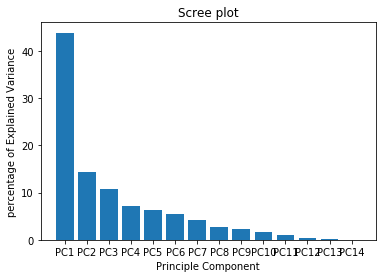

In [23]:
# Plot PCA
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree plot')
plt.show()

In [24]:
# All PCAs are made into single dataframe
train_append = pd.DataFrame(data=pca.data[:,:9], columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'
                                                           , 'PC8', 'PC9'])
new_train = pd.concat((claim_train_cat, train_append), axis = 1)
new_train.head(3)

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ... cat116       PC1  \
0    A    B    A    B    A    A    A    A    B     A  ...     LB  2.712420   
1    A    B    A    A    A    A    A    A    B     B  ...     DP -1.128251   
2    A    B    A    A    B    A    A    A    B     B  ...     GK -2.944429   

        PC2       PC3       PC4       PC5       PC6       PC7       PC8  \
0 -2.097249 -1.508894  0.624939 -0.557221 -0.206523  0.955626  1.103121   
1 -0.398775  2.285533 -0.757389 -0.351814 -0.601747 -1.062838  0.448429   
2  0.341641 -1.375024  1.256955 -0.209404  0.110918  0.039989  0.123385   

        PC9  
0 -1.373396  
1  0.210289  
2 -0.306170  

[3 rows x 125 columns]

In [25]:
# Contacte with categorical variables
pca.fit(scaled_test_cont)

pca.data = pca.transform(scaled_test_cont)

test_append = pd.DataFrame(data=pca.data[:,:9], columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'
                                                           , 'PC8', 'PC9'])
new_test = pd.concat((claim_test_cat, test_append), axis = 1)
new_test.head(3)

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ... cat116       PC1  \
0    A    B    A    A    A    A    A    A    B     A  ...     HG -0.918684   
1    A    B    A    B    A    A    A    A    B     A  ...     HK  1.285390   
2    A    B    A    B    B    A    B    A    B     B  ...     CK -3.409564   

        PC2       PC3       PC4       PC5       PC6       PC7       PC8  \
0 -1.342429 -1.250113 -0.509648  1.270164 -0.986195  1.037489  0.183526   
1 -0.423205  2.744861 -1.045106 -0.174174  1.670800  0.170511  0.040692   
2  0.422764  1.315212 -0.779952 -0.689147 -0.231982 -0.441353 -0.084793   

        PC9  
0 -0.427330  
1 -0.683555  
2  0.168652  

[3 rows x 125 columns]

In [26]:
# sample calucation of one categirical variable

A = claim_train_cat['cat14'].value_counts()
print(A)
print(sum(A))
print(sum(A[1:])/sum(A)*100)

A    186041
B      2277
Name: cat14, dtype: int64
188318
1.2091249907072081


In [27]:
# Removing unwanted categorical varibales
def show_and_drop_percentage(df, df2):
    for i in range(1, 117):
        A = df['cat' + str(i)].value_counts()
        per = sum(A[1:]) / sum(A) * 100
        if per < 2:
            print('cat' + str(i) + ': ' + 'Dominating percentage is: ' + str(np.round(per, 2)) + '%')
            df = df.drop(['cat' + str(i)], axis = 1)
            df2 = df2.drop(['cat' + str(i)], axis = 1)
    print('\n')
    print('Cleaning complete for columns cat1 to cat 116, The above categories had been dropped\n')
    return df, df2
removed_train, removed_test = show_and_drop_percentage(new_train, new_test)

cat14: Dominating percentage is: 1.21%
cat15: Dominating percentage is: 0.02%
cat17: Dominating percentage is: 0.7%
cat18: Dominating percentage is: 0.52%
cat19: Dominating percentage is: 0.96%
cat20: Dominating percentage is: 0.11%
cat21: Dominating percentage is: 0.22%
cat22: Dominating percentage is: 0.02%
cat29: Dominating percentage is: 1.98%
cat30: Dominating percentage is: 1.89%
cat32: Dominating percentage is: 0.64%
cat33: Dominating percentage is: 0.51%
cat34: Dominating percentage is: 0.31%
cat35: Dominating percentage is: 0.11%
cat42: Dominating percentage is: 0.9%
cat46: Dominating percentage is: 0.47%
cat47: Dominating percentage is: 0.37%
cat48: Dominating percentage is: 0.14%
cat51: Dominating percentage is: 0.66%
cat55: Dominating percentage is: 0.08%
cat56: Dominating percentage is: 0.1%
cat57: Dominating percentage is: 1.6%
cat58: Dominating percentage is: 0.13%
cat59: Dominating percentage is: 0.16%
cat60: Dominating percentage is: 0.24%
cat61: Dominating percentage 

In [28]:
print(removed_train.shape)
print(removed_test.shape)
print(removed_train.columns.values)
print(removed_test.columns.values)

(188318, 87)
(125546, 87)
['cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9' 'cat10'
 'cat11' 'cat12' 'cat13' 'cat16' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat31' 'cat36' 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat43'
 'cat44' 'cat45' 'cat49' 'cat50' 'cat52' 'cat53' 'cat54' 'cat66' 'cat71'
 'cat72' 'cat73' 'cat75' 'cat76' 'cat79' 'cat80' 'cat81' 'cat82' 'cat83'
 'cat84' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90' 'cat91' 'cat92' 'cat93'
 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99' 'cat100' 'cat101'
 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107' 'cat108' 'cat109'
 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115' 'cat116' 'PC1'
 'PC2' 'PC3' 'PC4' 'PC5' 'PC6' 'PC7' 'PC8' 'PC9']
['cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9' 'cat10'
 'cat11' 'cat12' 'cat13' 'cat16' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat31' 'cat36' 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat43'
 'cat44' 'cat45' 'cat49' 'cat50' 'cat52' 'cat53' 'cat54' 'c

In [33]:
# Get ony categorical varibales
remove_train_cat = []

for colName,x in removed_train.iloc[1,:].iteritems():
    
    if(str(x).isalpha()):
        
        remove_train_cat.append(colName)

In [35]:
# Perform label encoding 
from sklearn.preprocessing import LabelEncoder

for i in remove_train_cat:
    
    le = LabelEncoder()
    
    le.fit(removed_train[i].unique())
    
    removed_train[i] = le.transform(removed_train[i])
    
print(removed_train.head())

   cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  ...  cat116  \
0     0     1     0     1     0     0     0     0     1      0  ...     269   
1     0     1     0     0     0     0     0     0     1      1  ...      85   
2     0     1     0     0     1     0     0     0     1      1  ...     153   
3     1     1     0     1     0     0     0     0     1      0  ...      79   
4     0     1     0     1     0     0     0     0     1      1  ...      55   

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.712420 -2.097249 -1.508894  0.624939 -0.557221 -0.206523  0.955626   
1 -1.128251 -0.398775  2.285533 -0.757389 -0.351814 -0.601747 -1.062838   
2 -2.944429  0.341641 -1.375024  1.256955 -0.209404  0.110918  0.039989   
3 -1.592256  0.073501 -0.419776  0.400072 -0.004298 -1.250632 -0.039572   
4 -4.065654 -1.052150 -0.663076 -0.244161 -0.846995  0.893034 -0.757272   

        PC8       PC9  
0  1.103121 -1.373396  
1  0.448429  0.210289  
2 

In [37]:
# Get only categorical variables
remove_test_cat = []

for colName,x in removed_test.iloc[1,:].iteritems():
    
    if(str(x).isalpha()):
        
        remove_test_cat.append(colName)

In [38]:
# Undergo Label encoding
from sklearn.preprocessing import LabelEncoder

for i in remove_test_cat:
    
    le = LabelEncoder()
    
    le.fit(removed_test[i].unique())
    
    removed_test[i] = le.transform(removed_test[i])
    
print(removed_test.head())

   cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  ...  cat116  \
0     0     1     0     0     0     0     0     0     1      0  ...     169   
1     0     1     0     1     0     0     0     0     1      0  ...     173   
2     0     1     0     1     1     0     1     0     1      1  ...      51   
3     0     0     0     0     1     0     0     0     0      0  ...      76   
4     1     0     0     0     0     1     0     0     0      0  ...     163   

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.918684 -1.342429 -1.250113 -0.509648  1.270164 -0.986195  1.037489   
1  1.285390 -0.423205  2.744861 -1.045106 -0.174174  1.670800  0.170511   
2 -3.409564  0.422764  1.315212 -0.779952 -0.689147 -0.231982 -0.441353   
3 -2.056335  0.368740  0.172230  0.304789  0.531324 -1.395798  0.008083   
4 -0.882107 -1.453306 -1.531626  1.333115 -0.143726  0.832967 -1.219621   

        PC8       PC9  
0  0.183526 -0.427330  
1  0.040692 -0.683555  
2 

In [39]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(removed_train, claim_train_target, test_size=0.25, random_state=2020)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(141238, 87)
(47080, 87)
(141238, 1)
(47080, 1)


In [43]:
# Undergo standardization to fall all variables into certain range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Linear Regression
from sklearn.linear_model import LinearRegression as lr

lrg = lr()

lrg.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_absolute_error

lrg_pred = lrg.predict(X_test_scaled)

lrg_mae = mean_absolute_error(y_test, lrg_pred)

print(lrg_mae)

1347.0671104567004


In [46]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}

model = GBR(**params)

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error

GBR_mae = mean_absolute_error(y_test,predictions)

print(mean_absolute_error(y_test,predictions))

C:\Users\shalini lingampally\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1291.536456927498


In [44]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error

Bagging_mae = mean_absolute_error(y_test,predictions)

print(mean_absolute_error(y_test,predictions))

C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


1275.303274804588


In [45]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train_scaled, y_train)

predictions = regressor.predict(X_test_scaled)


from sklearn.metrics import mean_absolute_error

DTR_mae = mean_absolute_error(y_test,predictions)

print(mean_absolute_error(y_test,predictions))

1771.9808823279523


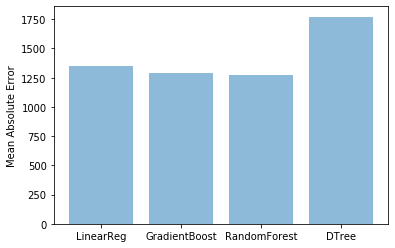

In [47]:
# Graph to see which gives best result
objects = ('LinearReg','GradientBoost','RandomForest','DTree')

y_pos = np.arange(len(objects))

performance = [lrg_mae,GBR_mae, Bagging_mae, DTR_mae]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.xticks(y_pos, objects)

plt.ylabel('Mean Absolute Error')

plt.show()

In [72]:
# By above analysis Randomforest gives less mae than compared to all
# So,apply it on test data and save results to submission.csv

Test_scaled = scaler.transform(removed_test)

predictions = clf.predict(Test_scaled)

pd.DataFrame(predictions, columns = ['loss']).to_csv('submission.csv')

In [63]:
# To undergo keras model change them to matrix form
x_train = pd.DataFrame(X_train_scaled).as_matrix()
y = np.log(y_train).as_matrix()
x_test = pd.DataFrame(X_test_scaled).as_matrix()

C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
# Sequential modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU

def nn_model(x_train_):
    model = Sequential()
    
    model.add(Dense(400, input_dim = x_train_.shape[1], init = 'he_normal'))
    model.add(PReLU())
    model.add(Dropout(0.4))
    
    model.add(Dense(200, init = 'he_normal'))
    model.add(PReLU())
    model.add(Dropout(0.2))
    model.add(Dense(1, init = 'he_normal'))
    model.compile(loss = 'mae', optimizer = 'adadelta')
    
    return(model)

In [67]:
# 25 iterations are done to reduce error and get optinum results
model=nn_model(x_train)

n_epochs = 25

fit = model.fit(x_train, y, nb_epoch = n_epochs,batch_size=250,verbose = 1)

pred = model.predict(x_test,verbose=1)

C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=87, kernel_initializer="he_normal")`
  
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="he_normal")`
  if sys.path[0] == '':
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="he_normal")`
  from ipykernel import kernelapp as app
C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/25
141238/141238 [==============================] - 11s 79us/step - loss: 1.0212
Epoch 2/25
141238/141238 [==============================] - 8s 57us/step - loss: 0.8048
Epoch 3/25
141238/141238 [==============================] - 8s 57us/step - loss: 0.7000
Epoch 4/25
141238/141238 [==============================] - 8s 58us/step - loss: 0.6577: 
Epoch 5/25
141238/141238 [==============================] - 8s 57us/step - loss: 0.6358
Epoch 6/25
141238/141238 [==============================] - 8s 58us/step - loss: 0.6185
Epoch 7/25
141238/141238 [==============================] - 8s 57us/step - loss: 0.6092
Epoch 8/25
141238/141238 [==============================] - 8s 56us/step - loss: 0.5964
Epoch 9/25
141238/141238 [==============================] - 8s 56us/step - loss: 0.5872
Epoch 10/25
141238/141238 [==============================] - 8s 57us/step - loss: 0.5815
Epoch 11/25
141238/141238 [==============================] - 8s 57us/step - loss: 0.5769
Epoch 12/25
141238/141238 [

In [73]:
# To undergo keras model change them to matrix form
# So,apply it on test data and save results to Kera_submission.csv

Test_scaled = scaler.transform(removed_test)

Test_scaled_modified = pd.DataFrame(Test_scaled).as_matrix()

predictions = model.predict(Test_scaled_modified)

pd.DataFrame(predictions, columns = ['loss']).to_csv('Kera_submission.csv')

C:\Users\shalini lingampally\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
